## Using XGBoost in Python

XGBoost is one of the most popular machine learning algorithm these days. Regardless of the type of prediction task at hand; regression or classification.

XGBoost is well known to provide better solutions than other machine learning algorithms. In fact, since its inception, it has become the "state-of-the-art” machine learning algorithm to deal with structured data.

But what makes XGBoost so popular?

- **Speed and performance** : Originally written in C++, it is comparatively faster than other ensemble classifiers.
- **Core algorithm is parallelizable** : Because the core XGBoost algorithm is parallelizable it can harness the power of multi-core computers. It is also parallelizable onto GPU’s and across networks of computers making it feasible to train on very large datasets as well.
- **Consistently outperforms other algorithm methods** : It has shown better performance on a variety of machine learning benchmark datasets.
- **Wide variety of tuning parameters** : XGBoost internally has parameters for cross-validation, regularization, user-defined objective functions, missing values, tree parameters, scikit-learn compatible API etc.

XGBoost (Extreme Gradient Boosting) belongs to a family of boosting algorithms and uses the gradient boosting (GBM) framework at its core. It is an optimized distributed gradient boosting library.

## Boosting

Boosting is a sequential technique which works on the principle of an ensemble. It combines a set of weak learners and delivers improved prediction accuracy. At any instant t, the model outcomes are weighed based on the outcomes of previous instant t-1. The outcomes predicted correctly are given a lower weight and the ones miss-classified are weighted higher. Note that a weak learner is one which is slightly better than random guessing. For example, a decision tree whose predictions are slightly better than 50%. Let's understand boosting in general with a simple illustration.

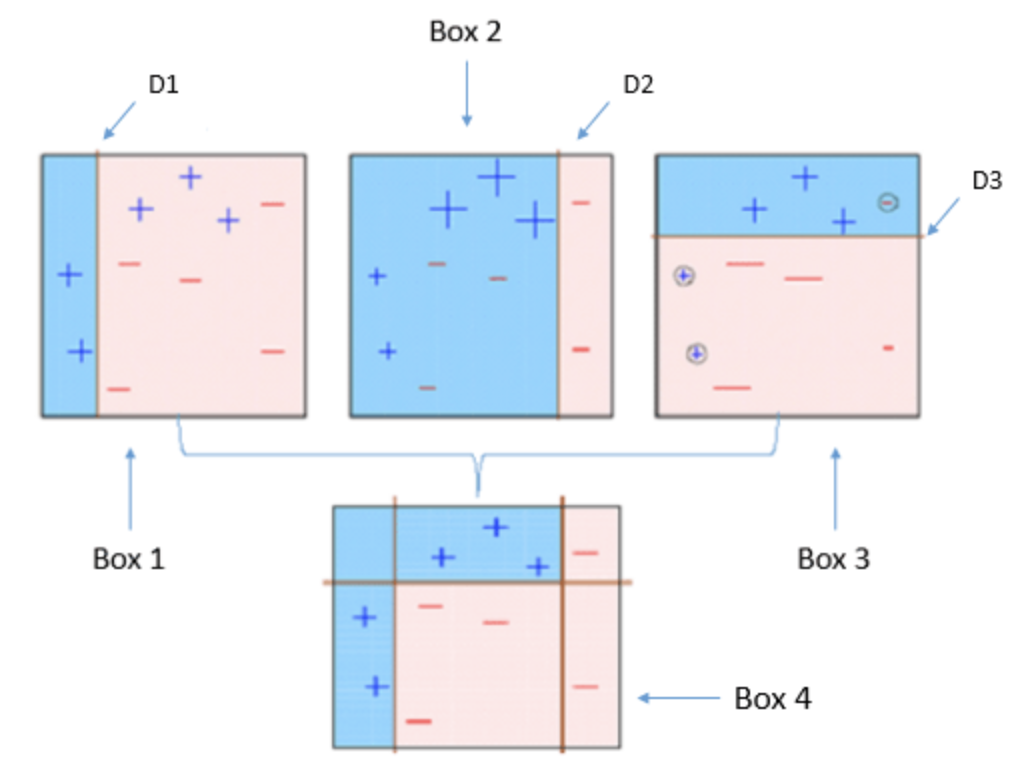

Four classifiers (in 4 boxes), shown above, are trying to classify + and - classes as homogeneously as possible.

1. **Box 1**: The first classifier (usually a decision stump) creates a vertical line (split) at D1. It says anything to the left of D1 is + and anything to the right of D1 is -. However, this classifier misclassifies three + points.
Note a Decision Stump is a Decision Tree model that only splits off at one level, therefore the final prediction is based on only one feature.
2. **Box 2**: The second classifier gives more weight to the three + misclassified points (see the bigger size of +) and creates a vertical line at D2. Again it says, anything to the right of D2 is - and left is +. Still, it makes mistakes by incorrectly classifying three - points.
3. **Box 3**: Again, the third classifier gives more weight to the three - misclassified points and creates a horizontal line at D3. Still, this classifier fails to classify the points (in the circles) correctly.
4. **Box 4**: This is a weighted combination of the weak classifiers (Box 1,2 and 3). As you can see, it does a good job at classifying all the points correctly.
That's the basic idea behind boosting algorithms is building a weak model, making conclusions about the various feature importance and parameters, and then using those conclusions to build a new, stronger model and capitalize on the misclassification error of the previous model and try to reduce it. Now, let's come to XGBoost. To begin with, you should know about the default base learners of XGBoost: tree ensembles. The tree ensemble model is a set of classification and regression trees (CART). Trees are grown one after another ,and attempts to reduce the misclassification rate are made in subsequent iterations. Here’s a simple example of a CART that classifies whether someone will like computer games straight from the XGBoost's documentation.
If you check the image in Tree Ensemble section, you will notice each tree gives a different prediction score depending on the data it sees and the scores of each individual tree are summed up to get the final score.

We will be using XGBoost to solve a regression problem. The dataset is taken from the UCI Machine Learning Repository and is also present in sklearn's datasets module. It has 14 explanatory variables describing various aspects of residential homes in Boston, the challenge is to predict the median value of owner-occupied homes per $1000s.

Import the Boston Housing dataset and store it in a variable called boston. Explore the dataset.

In [ ]:
from sklearn.datasets import load_boston
boston = load_boston()

print(boston.keys())

print(boston.data.shape)

print(boston.feature_names)

print(boston.DESCR)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
(506, 13)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Bos

Convert the dataset to pandas dataframe and also print the first 5 rows.

In [ ]:
import pandas as pd

data = pd.DataFrame(boston.data)
data.columns = boston.feature_names

print(data.head())

      CRIM    ZN  INDUS  CHAS    NOX  ...  RAD    TAX  PTRATIO       B  LSTAT
0  0.00632  18.0   2.31   0.0  0.538  ...  1.0  296.0     15.3  396.90   4.98
1  0.02731   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  396.90   9.14
2  0.02729   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  392.83   4.03
3  0.03237   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  394.63   2.94
4  0.06905   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  396.90   5.33

[5 rows x 13 columns]


You'll notice that there is no column called PRICE in this DataFrame. This is because the target column is available in another attribute called `boston.target`. Append `boston.target` to your pandas DataFrame.

In [ ]:
data['PRICE'] = boston.target

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


Get the summary statistics

In [ ]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


If you plan to use XGBoost on a dataset which has categorical features you may want to consider applying some encoding (like one-hot encoding) to such features before training the model. Also, if you have some missing values such as NA in the dataset you may or may not do a separate treatment for them, because XGBoost is capable of handling missing values internally. 

Without delving into more exploratory analysis and feature engineering, we will now focus on applying the algorithm to train the model on this data.

We will build the model using Trees as base learners (which are the default base learners) using XGBoost's scikit-learn compatible API. Along the way, we will also learn some of the common tuning parameters which XGBoost provides in order to improve the model's performance, and using the root mean squared error (RMSE) performance metric to check the performance of the trained model on the test set. Root mean Squared error is the square root of the mean of the squared differences between the actual and the predicted values. As usual, we start by importing the library xgboost and other important libraries that you will be using for building the model.

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

Separate the target variable and rest of the variables using .iloc to subset the data.

In [ ]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

Now we will convert the dataset into an optimized data structure called Dmatrix that XGBoost supports and gives it acclaimed performance and efficiency gains.

In [ ]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

### XGBoost's hyperparameters

At this point, before building the model, we should be aware of the tuning parameters that XGBoost provides. Well, there are a plethora of tuning parameters for tree-based learners in XGBoost and you can read all about them here. But the most common ones that we should know are:

- **learning_rate**: step size shrinkage used to prevent overfitting. Range is [0,1]
- **max_depth**: determines how deeply each tree is allowed to grow during any boosting round.
- **subsample**: percentage of samples used per tree. Low value can lead to underfitting.
- **colsample_bytree**: percentage of features used per tree. High value can lead to overfitting.
- **n_estimators**: number of trees you want to build.
- **objective**: determines the loss function to be used like reg:linear for regression problems, reg:logistic for classification problems with only decision, binary:logistic for classification problems with probability.

XGBoost also supports regularization parameters to penalize models as they become more complex and reduce them to simple (parsimonious) models.

- **gamma**: controls whether a given node will split based on the expected reduction in loss after the split. A higher value leads to fewer splits. Supported only for tree-based learners.
- **alpha**: L1 regularization on leaf weights. A large value leads to more regularization.
- **lambda**: L2 regularization on leaf weights and is smoother than L1 regularization.

It's also worth mentioning that though you are using trees as your base learners, you can also use XGBoost's relatively less popular linear base learners and one other tree learner known as dart. All you have to do is set the booster parameter to either gbtree (default),gblinear or dart.

Now, we will create the train and test set for cross-validation of the results using the train_test_split function from sklearn's model_selection module with test_size size equal to 20% of the data. Also, to maintain reproducibility of the results, a random_state is also assigned.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

The next step is to instantiate an XGBoost regressor object by calling the XGBRegressor() class from the XGBoost library with the hyper-parameters passed as arguments. For classification problems, we would have used the XGBClassifier() class.

In [ ]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 100)

Fit the regressor to the training set and make predictions on the test set using the familiar .fit() and .predict() methods.

In [ ]:
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

[02:21:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


Compute the rmse by invoking the mean_sqaured_error function from sklearn's metrics module.

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 3.851546


In [ ]:
from sklearn.linear_model import LinearRegression

linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train,y_train)

pred_train = linear_reg_model.predict(X_train)
train_rmse = np.sqrt(mean_squared_error(y_train,pred_train))
print("Train RMSE: %f" % (train_rmse))

pred_test = linear_reg_model.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test,pred_test))
print("Test RMSE: %f" % (test_rmse))

Train RMSE: 4.547209
Test RMSE: 5.309660


Well, we can see that your RMSE for the price prediction came out to be around 10.8 per 1000$.

### k-fold Cross Validation using XGBoost

In order to build more robust models, it is common to do a k-fold cross validation where all the entries in the original training dataset are used for both training as well as validation. Also, each entry is used for validation just once. XGBoost supports k-fold cross validation via the cv() method. All you have to do is specify the nfolds parameter, which is the number of cross validation sets you want to build.

Also, it supports many other parameters like -

- **num_boost_round**: denotes the number of trees you build (analogous to n_estimators)
- **metrics**: tells the evaluation metrics to be watched during CV
- **as_pandas**: to return the results in a pandas DataFrame.
early_stopping_rounds: finishes training of the model early if the hold-out metric ("rmse" in our case) does not improve for a given number of rounds.
- **seed**: for reproducibility of results.

This time we will create a hyper-parameter dictionary params which holds all the hyper-parameters and their values as key-value pairs but will exclude the n_estimators from the hyper-parameter dictionary because we will use num_boost_rounds instead.


We will use these parameters to build a 3-fold cross validation model by invoking XGBoost's cv() method and store the results in a cv_results DataFrame. Note that here we are using the Dmatrix object we created before.

In [ ]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

[02:18:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:18:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:18:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


cv_results contains train and test RMSE metrics for each boosting round.

In [ ]:
cv_results.head()


,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,21.679234,0.025626,21.677613,0.050617
1,19.772293,0.016054,19.773320,0.020571
2,18.049563,0.058904,18.065856,0.082746
3,16.430113,0.013615,16.492199,0.020919
4,15.025977,0.062132,15.132644,0.073104


Extract and print the final boosting round metric.

In [ ]:
print((cv_results["test-rmse-mean"]).tail(1))

49    3.975679
Name: test-rmse-mean, dtype: float64


We can see that your RMSE for the price prediction has reduced as compared to last time and came out to be around 4.03 per 1000$. We can reach an even lower RMSE for a different set of hyper-parameters.

### Visualize Boosting Trees and Feature Importance

We can also visualize individual trees from the fully boosted model that XGBoost creates using the entire housing dataset. XGBoost has a plot_tree() function that makes this type of visualization easy. Once you train a model using the XGBoost learning API, you can pass it to the plot_tree() function along with the number of trees you want to plot using the num_trees argument.

In [ ]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

[02:21:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


Plotting the first tree with the matplotlib library:

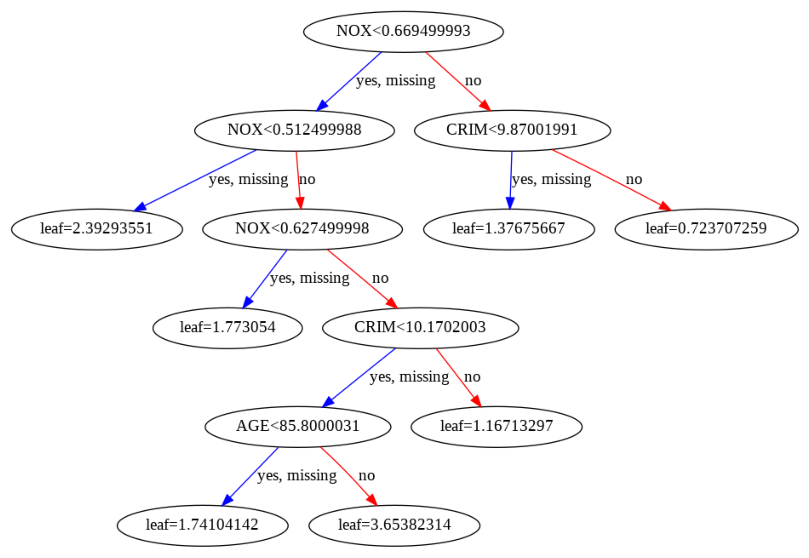

In [ ]:
import matplotlib.pyplot as plt

xgb.plot_tree(xg_reg,num_trees=1)
plt.rcParams['figure.figsize'] = [50, 10]
plt.show()

These plots provide insight into how the model arrived at its final decisions and what splits it made to arrive at those decisions.

Another way to visualize your XGBoost models is to examine the importance of each feature column in the original dataset within the model.

One simple way of doing this involves counting the number of times each feature is split on across all boosting rounds (trees) in the model, and then visualizing the result as a bar graph, with the features ordered according to how many times they appear. XGBoost has a plot_importance() function that allows you to do exactly this.

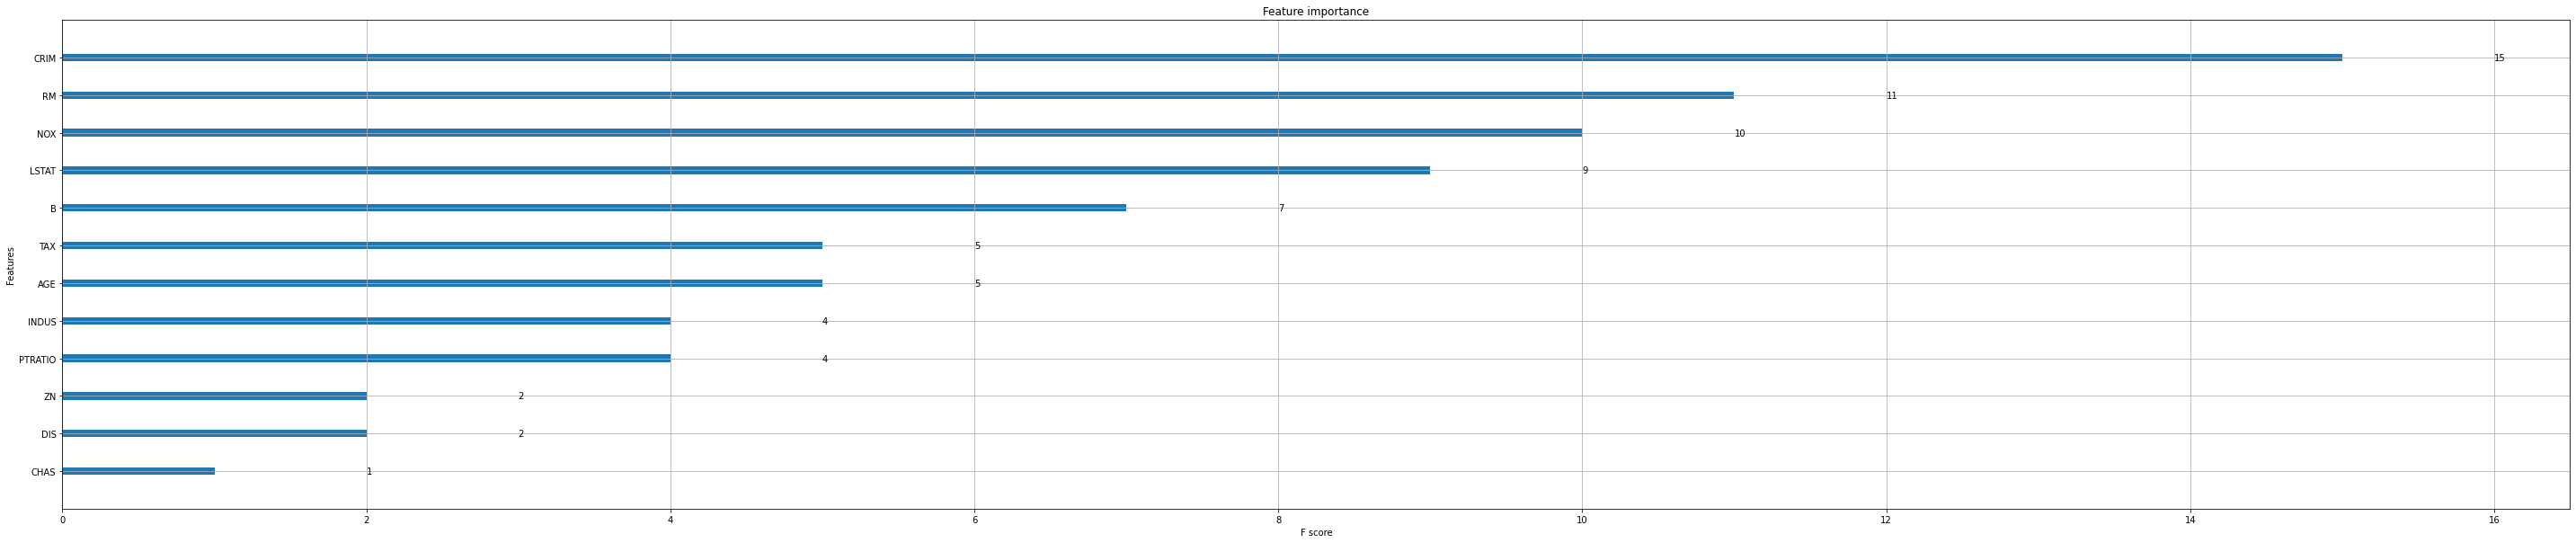

In [ ]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

As you can see the feature RM has been given the highest importance score among all the features. Thus XGBoost also gives you a way to do Feature Selection.